<img src="images/dataset-cover.jpg" width=796 height=400 />

# Sobre o conjunto de dados

## Declaração do problema

Você está trabalhando como cientista de dados em uma empresa financeira global. Ao longo dos anos, a empresa coletou dados bancários básicos e muitas informações relacionadas ao crédito. A gestão quer construir um sistema inteligente para segregar as pessoas em faixas de pontuação de crédito para reduzir os esforços manuais.

## Tarefa

Dadas as informações relacionadas ao crédito de uma pessoa, construir um modelo de aprendizado de máquina que possa classificar a pontuação de crédito.

### Importação das Bibliotecas

In [1]:
# BIBLIOTECAS
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import math

import scipy.stats as stats
from sklearn import preprocessing
from sklearn.impute import SimpleImputer


### Configurações

In [2]:
# Mostra todas as colunas do dataset
pd.set_option('display.max_columns', None)

# Desabilita os avisos - warnings
warnings.filterwarnings("ignore")

# Packages options 
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure size for all 

### Carregamento dos datasets

In [3]:
train = pd.read_csv('datasets/train.csv', low_memory=False)
test = pd.read_csv('datasets/test.csv', low_memory=False)

### Visualização dos Datasets

In [4]:
train.head().T

,0,1,2,3,4
ID,0x1602,0x1603,0x1604,0x1605,0x1606
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40
Month,January,February,March,April,May
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23,23,-500,23,23
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12
Monthly_Inhand_Salary,1824.843333,NaN,NaN,NaN,1824.843333
Num_Bank_Accounts,3,3,3,3,3


In [5]:
test.head().T

,0,1,2,3,4
ID,0x160a,0x160b,0x160c,0x160d,0x1616
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0x21b1
Month,September,October,November,December,September
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Rick Rothackerj
Age,23,24,24,24_,28
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,004-07-5839
Occupation,Scientist,Scientist,Scientist,Scientist,_______
Annual_Income,19114.12,19114.12,19114.12,19114.12,34847.84
Monthly_Inhand_Salary,1824.843333,1824.843333,1824.843333,NaN,3037.986667
Num_Bank_Accounts,3,3,3,3,2


- Os datasets train e test são idênticos, ou seja, eles já estão separados corretamente para o uso da criação dos modelos de Machine Learning.


### Informações do Datasets

In [6]:
# Dimensão das linhas e variáveis dos Datasets
print('Quantidade de dados em train: ', train.shape[0])
print('Quantidade de variáveis em train: ', train.shape[1])
print('------------------------------------')
print('Quantidade de dados em test: ', test.shape[0])
print('Quantidade de variáveis em test: ', test.shape[1])

Quantidade de dados em train:  100000
Quantidade de variáveis em train:  28
------------------------------------
Quantidade de dados em test:  50000
Quantidade de variáveis em test:  27


In [7]:
# Infos train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
# Infos test                                                
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

### Concatenar os Datasets

- Concatenar os Datasets será uma boa opção para começar o EDA.

In [9]:
df = pd.concat([train, test], ignore_index=True)

### Renomear as colunas

In [11]:
lst_columns = {'Customer_ID':'id_cliente',
               'Month':'mes',
               'Name':'nome',
               'Age':'idade',
               'SSN':'cpf',
               'Occupation':'profissao',
               'Annual_Income':'renda_anual',
               'Monthly_Inhand_Salary':'salario_mensal',
               'Num_Bank_Accounts':'numero_de_contas_bancarias',
               'Num_Credit_Card':'numero_de_cartoes_de_credito',
               'Interest_Rate':'taxa_de_juro',
               'Num_of_Loan':'numero_de_emprestimos',
               'Type_of_Loan':'tipo_de_emprestimo',
               'Delay_from_due_date':'atraso_na_data_de_vencimento',
               'Num_of_Delayed_Payment':'numero_de_atrasos_de_pagamento',
               'Changed_Credit_Limit':'limite_de_credito_alterado',
               'Num_Credit_Inquiries':'numero_de_consultas_de_credito',
               'Credit_Mix':'mix_de_credito',
               'Outstanding_Debt':'divida_a_pagar',
               'Credit_Utilization_Ratio':'taxa_de_utilizacao_de_credito',
               'Credit_History_Age':'tempo_do_historico_de_credito',
               'Payment_of_Min_Amount':'pagamento_do_valor_minimo',
               'Total_EMI_per_month':'total_por_mes_parcelas_mensais_faceis_emi',
               'Amount_invested_monthly':'valor_investido_mensalmente',
               'Payment_Behaviour':'comportamento_do_pagamento',
               'Monthly_Balance':'saldo_mensal',
               'Credit_Score':'pontuacao_de_credito'
               }

In [12]:
df.rename(
    columns = lst_columns, inplace = True
)

In [13]:
df.rename(
    columns = lst_columns, inplace = True
)

### Filtragem de colunas

- Para obter um dataset mais clean, seria bom filtrar apenas com as features mais importantes para a análise.

In [14]:
lst_columns_to_remove = ['ID','id_cliente', 'cpf']
df = df.drop(columns=lst_columns_to_remove)

### Alterar os tipos das colunas nos Datasets

In [15]:
# Lista das colunas para conversão
lst_columns_to_change = ['idade', 'renda_anual', 
                         'numero_de_emprestimos', 'numero_de_atrasos_de_pagamento',
                         'limite_de_credito_alterado', 'divida_a_pagar', 'valor_investido_mensalmente',
                         'saldo_mensal']

# loop para percorrer a partir da lista lst_columns_to_change os datasets e mudar o tipo das colunas train e test
for i in lst_columns_to_change:
    df[i] = pd.to_numeric(df[i], errors = 'coerce')
    
# aqui foi mudado individualmente a coluna idade para o formato int64
df['idade'] = df['idade'].astype('Int64')


###  Missing Values

In [16]:
df.isna().sum()

mes                                              0
nome                                         15000
idade                                         7416
profissao                                        0
renda_anual                                  10500
salario_mensal                               22500
numero_de_contas_bancarias                       0
numero_de_cartoes_de_credito                     0
taxa_de_juro                                     0
numero_de_emprestimos                         7221
tipo_de_emprestimo                           17112
atraso_na_data_de_vencimento                     0
numero_de_atrasos_de_pagamento               14671
limite_de_credito_alterado                    3150
numero_de_consultas_de_credito                3000
mix_de_credito                                   0
divida_a_pagar                                1500
taxa_de_utilizacao_de_credito                    0
tempo_do_historico_de_credito                13500
pagamento_do_valor_minimo      

- Temos valores ausentes (Missing Values) no Dataset:
    - nome, idade, renda_anual, salario_mensal, numero_de_emprestimos, tipo_de_emprestimo, 
    - numero_de_atrasos_de_pagamento, limite_de_credito_alterado, numero_de_consultas_de_credito,
    - divida_a_pagar, tempo_do_historico_de_credito, valor_investido_mensalmente, saldo_mensal             
- Possiveis variáveis com dtypes diferentes no Dataset.

### Variáveis Numéricas e Categóricas

In [17]:
num_df = df.select_dtypes(exclude = ['object'])
cat_df = df.select_dtypes(exclude = ['object'])

## Análise Exploratória dos Dados

### Análise Univariada

#### 1. Qual é a distribuição dos meses dos clientes?

In [22]:
df.mes.value_counts()

January      12500
February     12500
March        12500
April        12500
May          12500
June         12500
July         12500
August       12500
September    12500
October      12500
November     12500
December     12500
Name: mes, dtype: int64

- Como meses são variáveis qualitativas ordinais, seria ideal ordenar numericamente cada mês. 

In [23]:
month_map = { 'January':1,
              'February':2,
              'March':3,
              'April':4,
              'May':5,
              'June':6,
              'july':7,
              'August':8}

df['mes'] = df['mes'].map(month_map)
df['mes'] = pd.to_numeric(df['mes'], errors = 'coerce').astype('Int64')


- São 12.500 valores em cada mês de Janeiro até o mês de Agosto, há Missing Values.

#### 2. Qual é a distribuição da idade dos clientes?

In [24]:
df.idade.value_counts().sort_values(ascending = False)

39      4198
32      4189
28      4173
26      4140
35      4130
        ... 
529        1
8386       1
5924       1
6427       1
5826       1
Name: idade, Length: 2355, dtype: Int64

In [25]:
df.idade.unique()

<IntegerArray>
[  23, -500, <NA>,   28,   34,   54,   55,   21,   31,   33,
 ...
 5038, 1365, 2200, 8361,  459, 3054, 5586,  326, 7910, 5826]
Length: 2356, dtype: Int64

In [26]:
df.idade.max()

8698

In [27]:
df.idade.min()

-500

- Temos idades fora da realidade, -500, 1342, 669, 2620, e valores com NA. Será preciso entender melhor o que acontece,
mas utilizando o value_counts as idades 38, 28 e 31 apareceram com mais frequência.

#### 3. Qual é a distribuição das profissões dos clientes?

Text(0.5, 0, 'Profissão')

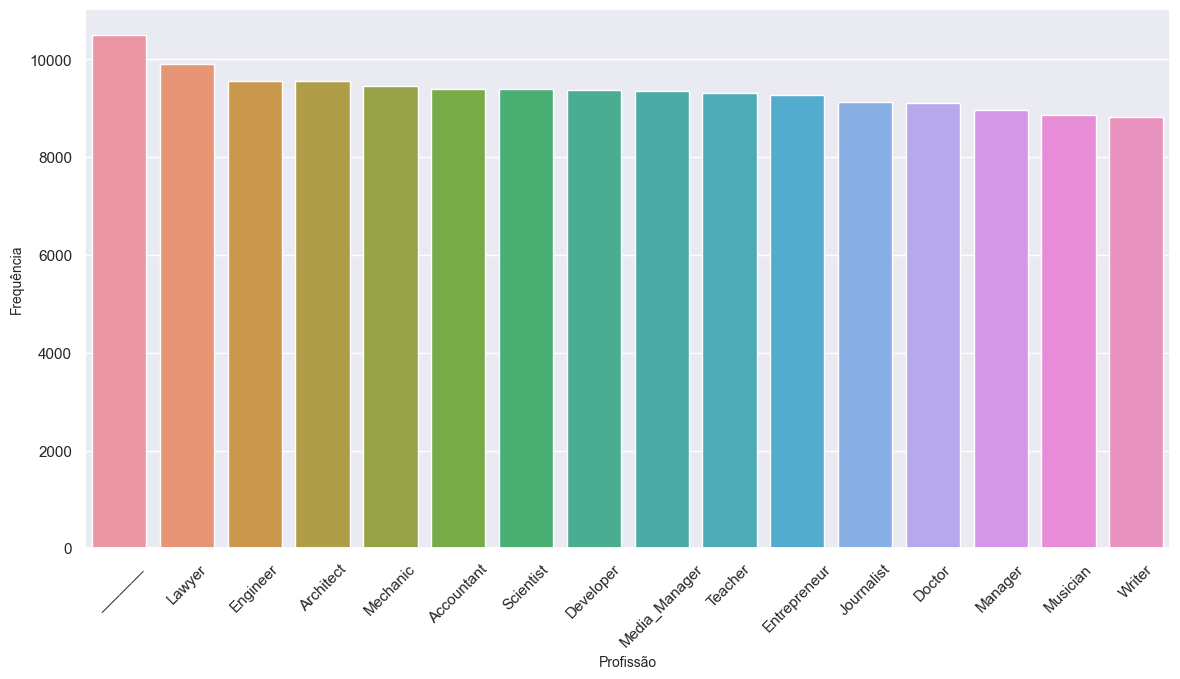

In [28]:
sns.set(style='darkgrid')
profissao_plot = sns.countplot(x = 'profissao', data = df, order = df['profissao'].value_counts().index)
profissao_plot.set_xticklabels(profissao_plot.get_xticklabels(), rotation=45)
plt.ylabel('Frequência', fontsize=10)
plt.xlabel('Profissão', fontsize=10)


- Indefinidos e Advogados são os mais frequentes, seguidos por Arquitetos, Engenheiros, Cientistas e Mecânicos.
- Será preciso descobrir se esses Indefinidos alteram a análise se caso forem excluídos.

#### 4. Qual é a distribuição da renda anual dos clientes?

In [29]:
df.renda_anual.value_counts().sort_values(ascending=False)

36585.12       24
17816.75       23
20867.67       23
9141.63        23
95596.35       23
               ..
15096047.00     1
6054600.00      1
3845546.00      1
22269915.00     1
250738.00       1
Name: renda_anual, Length: 13902, dtype: int64